## Introduction
In this notebook, I explore the data from the **Inside Airbnb Project**

In [17]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# load data
listings_data = pd.read_csv("data/listings.csv.gz",compression='gzip',
                            header=0,sep=',',quotechar='"',error_bad_lines=False,
                           low_memory=False)

In [68]:
# data overview
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200613063607,2020-06-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.59
1,3176,https://www.airbnb.com/rooms/3176,20200613063607,2020-06-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.09
2,3309,https://www.airbnb.com/rooms/3309,20200613063607,2020-06-15,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.32
3,7071,https://www.airbnb.com/rooms/7071,20200613063607,2020-06-15,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,f,moderate,f,f,2,0,2,0,2.22
4,9991,https://www.airbnb.com/rooms/9991,20200613063607,2020-06-15,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,moderate,f,f,1,1,0,0,0.14


In [69]:
# check data columns
print([x for x in listings_data.columns])

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [70]:
listings_data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.481300e+04,2.481300e+04,0.0,0.0,0.0,2.481300e+04,24792.000000,24792.000000,24813.000000,24813.000000,...,19598.000000,19617.000000,19599.000000,19596.000000,0.0,24813.000000,24813.000000,24813.000000,24813.000000,20143.000000
mean,2.211238e+07,2.020061e+13,NaN,NaN,NaN,7.823893e+07,3.813730,3.813730,52.510184,13.405715,...,9.732779,9.742162,9.593143,9.406563,NaN,2.504856,1.557127,0.716802,0.141095,0.800695
std,1.275083e+07,5.531361e+00,NaN,NaN,NaN,8.916216e+07,38.259841,38.259841,0.031711,0.059948,...,0.705917,0.703125,0.744395,0.868193,NaN,5.625141,4.942570,1.205022,1.992237,1.187053
min,2.015000e+03,2.020061e+13,NaN,NaN,NaN,1.581000e+03,0.000000,0.000000,52.340480,13.097180,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.121628e+07,2.020061e+13,NaN,NaN,NaN,1.103664e+07,1.000000,1.000000,52.489100,13.372780,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.150006e+07,2.020061e+13,NaN,NaN,NaN,3.974168e+07,1.000000,1.000000,52.509780,13.416000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.330000
75%,3.324213e+07,2.020061e+13,NaN,NaN,NaN,1.183807e+08,2.000000,2.000000,52.533220,13.439580,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.960000
max,4.376487e+07,2.020061e+13,NaN,NaN,NaN,3.496313e+08,1348.000000,1348.000000,52.656630,13.758420,...,10.000000,10.000000,10.000000,10.000000,NaN,58.000000,58.000000,14.000000,39.000000,23.930000


In [85]:
# clean up price values
def clean_prices_column(df,col):
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.split('.',expand=True)[0]
    df[col] = df[col].str.replace(',','')
#     df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int,errors='ignore')
    return df

# apply function
listings_data = clean_prices_column(listings_data,'price')
listings_data = clean_prices_column(listings_data,'weekly_price')
listings_data = clean_prices_column(listings_data,'monthly_price')
listings_data = clean_prices_column(listings_data,'security_deposit')
listings_data = clean_prices_column(listings_data,'cleaning_fee')


- As shown below, most apartments cost less than $500

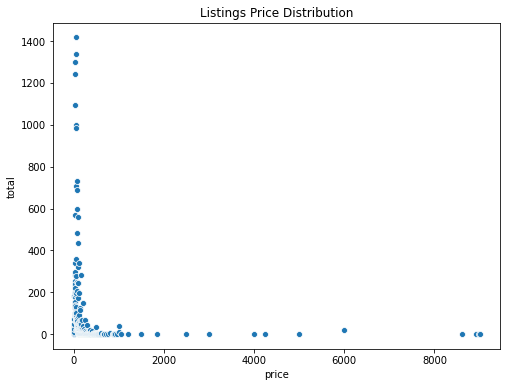

In [61]:
# create price summary
price_dist = listings_data.groupby('price')['id'].count().rename('total').reset_index().sort_values(by='price',ascending=True)

# plot distribution
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('price','total',data=price_dist,ax=ax)
plt.title("Listings Price Distribution")
plt.show()



In [80]:
selected_cols = listings_data[[ 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']]
selected_cols[selected_cols['price']>500].head()

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,...,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365
63,Entire home/apt,14,2.0,5.0,10.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,506,3200,...,1125,1125,3.0,1125.0,9 months ago,t,0,0,0,165
715,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",NaN,750,0,...,30,30,1.0,30.0,6 months ago,t,29,59,89,364
925,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",NaN,3000,400,...,1125,1125,10.0,1125.0,5 weeks ago,t,29,59,89,89
1619,Entire home/apt,15,2.0,0.0,1.0,Real Bed,"{Internet,Wifi,Elevator,""Indoor fireplace"",""Bu...",NaN,2500,2600,...,1125,1125,1.0,1125.0,20 months ago,t,29,59,89,89
2127,Entire home/apt,2,1.5,4.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",NaN,650,0,...,14,14,2.0,14.0,9 months ago,t,28,58,88,363


In [57]:
num_list =[x for x in range(8000) if x%200==0]
print(num_list)

[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800]


In [90]:
listings_data['weekly_price'].unique()

array([nan, '520', '175', '650', '420', '290', '920', '900', '600', '750',
       '210', '450', '320', '200', '280', '250', '260', '1137', '300',
       '350', '399', '580', '440', '360', '490', '599', '273', '3200',
       '155', '770', '425', '230', '405', '800', '351', '315', '400',
       '550', '850', '500', '630', '340', '530', '950', '150', '249',
       '190', '335', '330', '448', '455', '476', '292', '380', '325',
       '195', '274', '590', '880', '700', '965', '603', '378', '565',
       '540', '353', '385', '439', '398', '240', '202', '224', '180',
       '299', '343', '199', '1100', '613', '821', '426', '370', '489',
       '369', '169', '790', '345', '470', '270', '100', '220', '245',
       '390', '480', '560', '259', '512', '525', '483', '333', '415',
       '980', '272', '304', '396', '120', '395', '196', '329', '145',
       '235', '363', '248', '1400', '179', '140', '255', '610', '680',
       '460', '143', '462', '1200', '310', '295', '225', '160', '286',
       '43

In [82]:
listings_data.groupby('room_type')['id'].count().reset_index().sort_values(by='id')

,room_type,id
1,Hotel room,240
3,Shared room,307
2,Private room,11396
0,Entire home/apt,12870
